# plot for feature go

In [11]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


c1 = '#8696a7'
c2 = '#d8caaf'
c3 = '#A27E7E'
c4 = '#D8CAD9'
c5 = '#B5C4B1'


## statistics of generated conjunctions

In [18]:
# datasets = ['Bank', 'Adult', 'Credit', 'Employee', 'Criteo', 'Data1', 'Data2', 'Data3', 'Data4', 'Data5', 'Data6']
# second = [10, 10, 10, 10, 10, 10]
data = {
    'Bank': [3, 2, 0, 0],
    'Adult': [5, 1, 0, 0],
    'Credit': [3, 0, 0, 0],
    'Empl.': [7, 1, 2, 0],
    'Criteo': [8, 4, 1, 0],
    'Data1': [13, 8, 0, 0],
    'Data2': [6, 2, 0, 0],
    'Data3': [7, 8, 1, 0],
    'Data4': [10, 9, 4, 1],
    'Data5': [12, 10, 4, 1],
#     'Data6': [0, 0],
    }

datasets = ['Bank', 'Adult', 'Credit', 'Empl.', 'Criteo', 'Data1', 'Data2', 'Data3', 'Data4', 'Data5']
second = [data[a][0] for a in datasets]
high3 = [data[a][1] for a in datasets]
high4 = [data[a][2] for a in datasets]
highx = [data[a][3] for a in datasets]

SyntaxError: invalid syntax (<ipython-input-23-3866243be242>, line 1)

In [19]:
N = len(datasets)
ind = np.arange(N)
width = 0.35

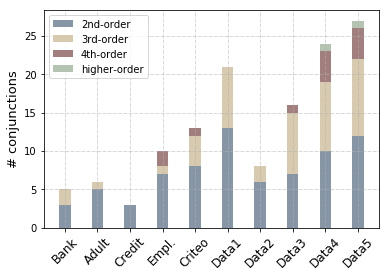

In [24]:
fig_dist = plt.figure()

p1 = plt.bar(ind, second, width, color=c1)
p2 = plt.bar(ind, high3, width, color=c2, bottom=second)
p3 = plt.bar(ind, high4, width, color=c3, bottom=[a+b for a,b in zip(second, high3)])
p4 = plt.bar(ind, highx, width, color=c5, bottom=[a+b+c for a,b,c in zip(second, high3, high4)])



plt.ylabel('# conjunctions', fontsize=13)
plt.xticks(ind, datasets, rotation=45, fontsize=12)
plt.grid(linestyle='-.',linewidth=0.5)

plt.legend((p1[0], p2[0], p3[0], p4[0]), ('2nd-order', '3rd-order', '4th-order', 'higher-order'))

# fig_dist

# fig_dist.savefig('exp_dist.pdf')
fig_dist.savefig('exp_dist1.pdf')

## Field-wise v.s. Full LR

In [25]:
data = {
    'Bank': [0.94, 0.9455, 0.95],
    'Adult': [0.9169, 0.928, 0.95],
    'Credit': [0.8292, 0.8567, 0.95],
    'Employee': [0.8655, 0.8942, 0.95]
}

datasets = ['Bank', 'Adult', 'Credit', 'Employee']
lr = np.array([data[a][0] for a in datasets])
fgo = np.array([data[a][1] for a in datasets]) - lr
flr = np.array([data[a][2] for a in datasets]) - lr

In [26]:
N = len(datasets)
ind = np.arange(N)
width = 0.1

<Figure size 432x432 with 0 Axes>

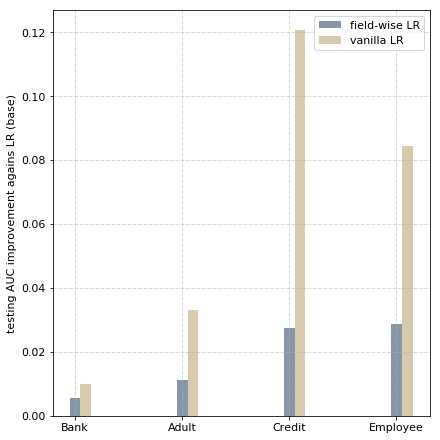

In [27]:
fig_vs = plt.figure()

fig, ax = plt.subplots()

plt.grid(linestyle='-.',linewidth=0.5)

# rects1 = ax.bar(ind - width, lr, width, color=c3, label='base')
rects2 = ax.bar(ind, fgo, width, color=c1, label='field-wise LR')
rects3 = ax.bar(ind + width, flr, width, color=c2, label='vanilla LR')

ax.set_ylabel('testing AUC improvement agains LR (base)')
ax.set_xticks(ind)
ax.set_xticklabels(datasets)
ax.legend()



plt.savefig('vs.pdf')

## FeatureGo runtime

In [32]:
N_n = 13  # number of numerical features
N_c = 26  # number of categorical features
N_final = 13 # number of generated conjunctions

iter_time = 716.6  # time (sec) of the first iteration

In [33]:
N_d = 3   # number of levels of granularity
N_ori = N_c + N_n * N_d  # number of original features
N_1 = N_ori * (N_ori - 1)   # number of candidates in the first iteration

runtime = 0
N_curr = N_ori

time_tick = [0]
for i in range(N_final):
    N_cand_red = 0  # duplicated conjuncstion, e.g., AB+C, AC+B, A+BC
    for s in range(i-1):
        N_cand_red += s * np.random.randint(0,5)
    N_cand = N_curr * (N_curr - 1) - N_cand_red
    runtime += iter_time * N_cand / N_1 * np.random.normal(1,0.1)
    N_curr += 1
    time_tick.append(runtime)

print(runtime / 3600)
print(time_tick)

3.0816745560741095
[0, 666.9530485270278, 1391.5488962281051, 2192.241619333422, 2977.1830972462753, 3753.026662901255, 4730.080919776616, 5523.756541180531, 6401.466917590777, 7269.728951098955, 8156.364835709204, 9164.531325847256, 10109.45245596244, 11094.028401866794]


In [30]:
time = {
    'Adult': [6,8,6,18,0.035727066640991303],
    'Bank': [10,10,5,37],
    'Credit': [10,0,13,63, 0.31442450436602337],
    'Employee': [0, 9, 10, 8, 0.05074455909421466],
    'Criteo': [13,26,13,716.6,3.0816745560741095]
    'Data1': [34, 28, 21, 135.54, 0.9327149502857239]
    'Data2': [8,19,8, 297.6, 0.7972675095710138],
    'Data3': [55,21,16,327.27,0.2587400776184998],
    'Data4': [7,19,24,259.4,2.757153798090474],
    'Data5': [8,18,27,427.88,5.186096847915131]
}

## AUC v.s. \# feature

In [26]:
data = {
    'Data1': [[0.840409,0.842999,0.845195,0.846774,0.847618,0.848106,0.848565,0.848978,0.849222,0.849377,0.849623,0.850041,0.850198,0.850534,0.850559,0.850594,0.850609,0.850688,0.850707,0.85073,0.850751,0.850898],
              [0, 141.4105168385067, 277.62614689510167, 426.8013192751705, 569.5761812471427, 705.3832990457089, 845.6357290462037, 1026.9399193777663, 1176.537536777094, 1338.696564191645, 1504.0151787548016, 1673.2688111298255, 1850.2955661620642, 2005.824905844577, 2145.0628988823405, 2326.454092037859, 2504.6529726196777, 2661.244829401736, 2853.3296660887822, 3007.8144431537607, 3194.4341773561914, 3357.773821028606]],
    'Data2': [[0.835089505,0.840719,0.843479,0.844649,0.845004,0.845333,0.845413,0.845739,0.846427],
              [0, 327.0749976944238, 682.7909908602163, 1023.4595238090384, 1335.825536664504, 1717.7761016541083, 2099.7027274235147, 2507.7489101669307, 2870.1630344556497]],
    'Data3': [[0.697671533,0.701841,0.703234,0.703533,0.704016,0.704076,0.704411,0.704538,0.704654,0.704774,0.704797,0.705134,0.705387,0.707769,0.707843,0.70785,0.70788],
              [0, 345.54402185908054, 772.7570412104487, 1176.4551606051427, 1480.265862771855, 1787.6873573419964, 2148.1436416372576, 2416.6747630878817, 2755.1008640279674, 3065.22313890157, 3397.763463309297, 3728.641603177446, 4056.5778035629883, 4379.129990152856, 4705.321161744106, 5073.6997292887645, 5474.078216987409]],
    'Data4': [[0.613816798,0.6186831,0.619033,0.619845,0.62109,0.621174,0.62261,0.623435,0.623796,0.624097,0.624817,0.625492,0.625612,0.626259,0.626665,0.626908,0.62705,0.627462,0.627753,0.62782,0.627821,0.62783,0.627831,0.627958,0.628054],
              [0, 283.64036516762656, 545.9537354292675, 767.6933562663726, 1065.2107664549867, 1423.85856616684, 1803.2213556015072, 2141.5720988778758, 2489.8720370434203, 2901.6493387251726, 3284.5282928441106, 3663.04643062311, 4027.053822993265, 4405.475706348578, 4837.1840063699065, 5200.460785682939, 5733.812792149084, 6181.2639386343935, 6716.829939758001, 7199.671704657559, 7757.956710562617, 8250.123968932092, 8770.747225964007, 9345.420252221718, 9925.753673125706]],
    'Data5': [[0.615843236,0.617860317,0.618259,0.61885,0.618892,0.619211,0.619272,0.620115,0.620219,0.620326,0.620633,0.621495,0.621894,0.622006,0.622132,0.622422,0.622881,0.623064,0.623085,0.623165,0.623203,0.623487,0.623675,0.623972,0.624021,0.624041,0.624553,0.62459],
              [0, 487.41831806718244, 875.2707433420165, 1287.4163400040738, 1829.5260101309186, 2350.0093122981716, 2878.606241273232, 3509.766209114041, 4186.147737851281, 4836.41491121407, 5436.831778263464, 6036.095265938933, 6704.144353344467, 7420.244274528135, 8113.618214344248, 8742.647132801549, 9543.109207996049, 10261.650242555119, 11053.715371083965, 11913.395394586927, 12578.010044906394, 13444.347651617914, 14206.25872992038, 15125.190187478569, 16084.3541038027, 16961.65721601154, 17698.042612369536, 18669.948652494473]],
}

name = ['Data1', 'Data2', 'Data3', 'Data4', 'Data5']
N = len(data)

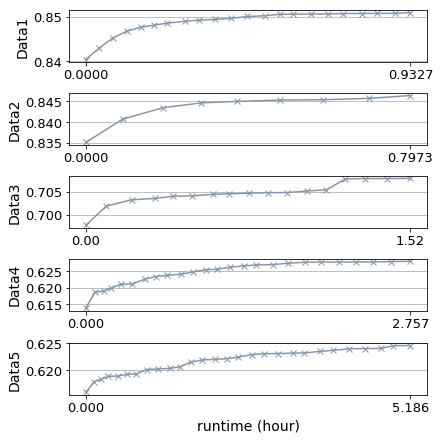

In [27]:
# fig_auc_curve = plt.figure(figsize=(8,10))
# plt.rcParams.update({'font.size': 11})
plt.rcParams["figure.figsize"] = [6,6]
# plt.subplots_adjust(bottom=0.2, top= 0.9, hspace = 0.3)

fig, axs = plt.subplots(N,1)
# plt.subplot(321)
# axs = []
# axs.append(plt.subplot(321,))
# axs.append(plt.subplot(322))
# axs.append(plt.subplot(323))
# axs.append(plt.subplot(324))
# axs.append(plt.subplot(325))

plt.rcParams['figure.constrained_layout.use'] = True
# plt.tight_layout()


for i in range(N):
    axs[i].plot(np.array(data[name[i]][1])/3600, data[name[i]][0], color=c1, marker='x')
#     axs[i].set_title(name[i])
#     axs[i].set_xlabel('runtime (sec)\n')
    axs[i].set_ylabel(name[i], fontsize=14)
#     axs[i].set_xticks((np.array(data[name[i]][1])/3600))
#     axs[i].set_xticks([0] + [' '] * (len(data[name[i]][1])-2) + [data[name[i]][1][-1]])
    axs[i].set_xticks([0, data[name[i]][1][-1]/3600])
    axs[i].grid(True, axis='y')
    axs[i].tick_params(labelsize=13)
#     axs[i].get_xaxis().set_visible(False)
#     axs[i].set_xticklabels([0] )
#     axs[i].grid(True)


plt.xlabel('runtime (hour)', fontsize=14)
# plt.ylabel('AUC')
plt.savefig('auccurve.pdf')

In [28]:
np.array(data[name[i]][1])/3600

array([0.        , 0.13539398, 0.24313076, 0.35761565, 0.50820167,
       0.65278036, 0.79961284, 0.97493506, 1.16281882, 1.34344859,
       1.51023105, 1.67669313, 1.86226232, 2.06117897, 2.25378284,
       2.42851309, 2.65086367, 2.8504584 , 3.07047649, 3.3092765 ,
       3.49389168, 3.73454101, 3.94618298, 4.20144172, 4.46787614,
       4.71157145, 4.91612295, 5.18609685])

In [ ]:
[0] + [' '] * (len(data[name[i]][1])-2) + [data[name[i]][1][-1]]

In [ ]:
[1] + [0]*12

In [ ]:
data[name[i]][1]

In [37]:
len([0.840409,0.842999,0.845195,0.846774,0.847618,0.848106,0.848565,0.848978,0.849222,0.849377,0.849623,0.850041,0.850198,0.850534,0.850559,0.850594,0.850609,0.850688,0.850707,0.85073,0.850751,0.850898])

22

## kaggle employee sample

In [38]:
df0 = pd.read_csv('~/Downloads/bank/bank.csv', delimiter=';')
# df1 = df0.
df0.head(5)


age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [46]:
df1 = df0[['age','job','marital','education','balance','housing']]

In [49]:
df1.columns=['age (n)', 'job (c)', 'marital (c)','education (c)','balance (n)','housing (c)']
df1.head(6)

age (n)      job (c) marital (c) education (c)  balance (n) housing (c)
0       30   unemployed     married       primary         1787          no
1       33     services     married     secondary         4789         yes
2       35   management      single      tertiary         1350         yes
3       30   management     married      tertiary         1476         yes
4       59  blue-collar     married     secondary            0         yes
5       35   management      single      tertiary          747          no